In [1]:
# Import yfinance and download Tesla stock data
import yfinance as yf

# Get historical data for Tesla
tesla_data = yf.download("TSLA", start="2015-01-01", end="2023-12-31")

# Reset index to move Date from index to a column
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

C:\Users\chauchuhei\AppData\Local\Temp\ipykernel_4356\1076242749.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [12]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame()

for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

if not tesla_revenue.empty:
    tesla_revenue.dropna(inplace=True)
    tesla_revenue.tail()
else:
    print(" 找不到 Tesla Revenue 的表格。")

 找不到 Tesla Revenue 的表格。


In [4]:
# Get GameStop stock data
gme_data = yf.download("GME", start="2015-01-01", end="2023-12-31")

# Reset index to include Date column
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

C:\Users\chauchuhei\AppData\Local\Temp\ipykernel_4356\3868395416.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download("GME", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2015-01-02,6.288958,6.355941,6.186623,6.337335,6450800
1,2015-01-05,6.460136,6.489907,6.201508,6.236860,19739600
2,2015-01-06,6.268491,6.703881,6.236861,6.543866,19540400
3,2015-01-07,6.195926,6.452694,6.136385,6.380129,10233200
4,2015-01-08,6.268491,6.357802,6.199648,6.251745,18189600


In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame()

for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break

if not gme_revenue.empty:
    gme_revenue.dropna(inplace=True)
    gme_revenue.tail()
else:
    print("找不到 GME Revenue 表格。")


找不到 GME Revenue 表格。


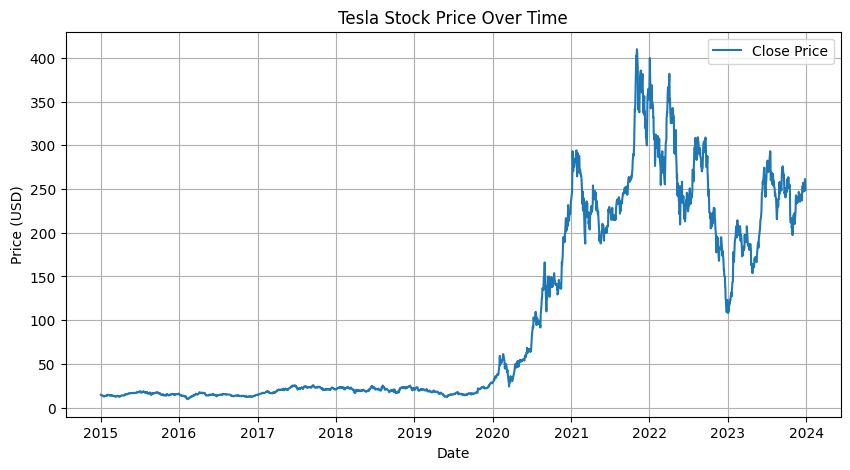

In [6]:
import matplotlib.pyplot as plt

# Define a reusable function for plotting
def make_graph(stock_data, stock_name):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Tesla data
make_graph(tesla_data, "Tesla")

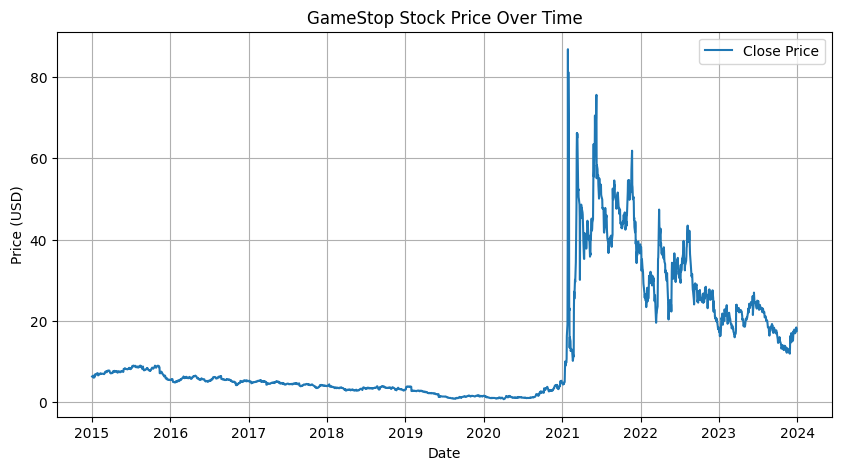

In [13]:
# Plot GameStop data using the same function
make_graph(gme_data, "GameStop")